<a href="https://colab.research.google.com/github/SelinErcan/DataMining/blob/main/DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

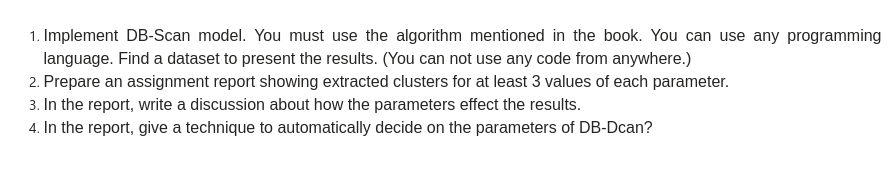

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas

In [ ]:
def find_neighbors(dataset, selected_point, eps): 
    #Dataseteki bütün data pointlerin seçilen data pointler arasındaki uzaklığa bakılır v eps değerine göre komşuları döndürür
    neighbors = []
    
    for points in range(0, len(dataset)):
        
        if numpy.linalg.norm(dataset[selected_point] - dataset[points]) < eps:
            neighbors.append(points)
            
    return neighbors

In [ ]:
def create_cluster(dataset, labels, point_index, neighbors, C, eps, MinPts):  
    #C clusterına ait bütün data poitleri bulur ve değerleri geri gönderir

    labels[point_index] = C  #pointe ait labelı yeni 

    i = 0
    while i < len(neighbors):  #bütün komşular için işlem yapar  
                
        selected_neighbor = neighbors[i] #bir komşuyu seçer
       
        if labels[selected_neighbor] == -1: #bu komşu daha önceden noise olarak labellanmışsa bunu şimdiki clustera labellar
            labels[selected_neighbor] = C   ##border point olarak kümeye eklenir çünkü eğer -1 atanmışsa yeteri kadar minpts puanı yoktur
        

        elif labels[selected_neighbor] == 0: #komşu eğer daha önce leballanmamışsa şimdiki clustera labellar
            
            labels[selected_neighbor] = C
            
            PnNeighborPts = find_neighbors(dataset, selected_neighbor, eps)
             #komşunun komşu sayısına bakılır.

            if len(PnNeighborPts) >= MinPts: #eğer minimum point sayısını sağlıyorsa bütün komşularını kuyruğa al.
                neighbors = neighbors + PnNeighborPts #yani o pointin komşuları arasında da border pointler olacaktır. 
            #else eğer sağlamıyorsa border point olarak zaten eklenmişti.

        i += 1     #bir sonraki komşuya geçer       
    

In [ ]:
def custom_DBSCAN(dataset, eps, MinPts): 
    #cluster listesini geri gönderir.-1 noise demek ve clusterlardan 1 den başlıyor.
    
    labels = [0]*len(dataset)  #elemanları 0 olan label dizisi oluşturuldu. (0 değeri pointin daha bir clustera ait olmadığını gösteriyor)
  
    C = 0 #cluster label

    for point_index in range(0, len(dataset)):  #datasetin içindeki bütün pointleri döndürür
    
        if not (labels[point_index] == 0):  #eğer point bir clustera aitse işlemleri atlar.
            continue
        
        neighbors = find_neighbors(dataset, point_index, eps) #komşuları hesapla

        if len(neighbors) < MinPts:  #eğer komşu sayısı minimum point sayısına ulaşamazsa bunları noise yapar.
            labels[point_index] = -1
    
        else: 
            C += 1  #eğer komşu sayısı minimum point sayısını geçerse clusterı oluşturur ve yeni cluster için değeri arttırır.(yeni label oluşturur)
            create_cluster(dataset, labels, point_index, neighbors, C, eps, MinPts)
    
    return labels  #datasete ait labelları geri gönderir.

In [ ]:
def performance(X,y_pred,y_true):
    #Clustering evaluation
    
    n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise_ = list(y_pred).count(-1)
    
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y_true, y_pred))
    print("V-measure: %0.3f" % metrics.v_measure_score(y_true, y_pred))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_true, y_pred))
    print("Adjusted Mutual Information: %0.3f"  % metrics.adjusted_mutual_info_score(y_true, y_pred))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_pred))

In [ ]:
#Algoritmayı denemek için random bir dataset oluşturuldu.
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, y_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3,
                            random_state=0)
y_true = y_true+1

X = StandardScaler().fit_transform(X)

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y_true, cmap='Paired')
plt.title("Original Dataset")

In [ ]:
eps_values = [0.1, 0.4, 0.5]
for eps in eps_values:
    y_pred = custom_DBSCAN(X, eps, MinPts=10)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN result with EPS value of " + str(eps))
    plt.show()
    plt.close()
    performance(X,y_pred,y_true)

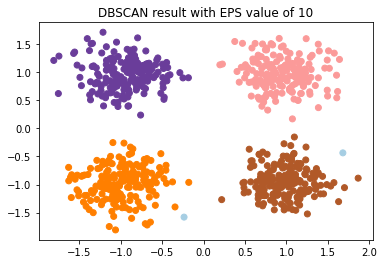

Estimated number of clusters: 4
Estimated number of noise points: 2
Homogeneity: 0.999
Completeness: 0.988
V-measure: 0.993
Adjusted Rand Index: 0.996
Adjusted Mutual Information: 0.993
Silhouette Coefficient: 0.678


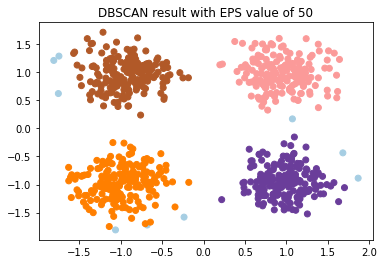

Estimated number of clusters: 4
Estimated number of noise points: 9
Homogeneity: 0.989
Completeness: 0.955
V-measure: 0.972
Adjusted Rand Index: 0.984
Adjusted Mutual Information: 0.972
Silhouette Coefficient: 0.706


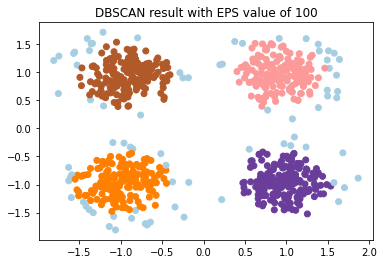

Estimated number of clusters: 4
Estimated number of noise points: 77
Homogeneity: 0.901
Completeness: 0.793
V-measure: 0.844
Adjusted Rand Index: 0.850
Adjusted Mutual Information: 0.843
Silhouette Coefficient: 0.610


In [ ]:
minpts_values = [10, 50, 100]
for minpts in minpts_values:
    y_pred = custom_DBSCAN(X, 0.4, MinPts=minpts)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN result with EPS value of " + str(minpts))
    plt.show()
    plt.close()
    performance(X,y_pred,y_true)